# 🏡 Min-Max Normalization Workshop
## Team Name: ML_HYZ
## Team Members: Haysam Elamin, Yu Chen Chou, Zhimin Xiong

* note: all the libraries required to run the code cells in this notebook are listed in the requirements.txt. To test on a different machine, run ```pip install -r requirements.txt```

### Step 1 - Load and display dataset


In [14]:
import pandas as pd
df = pd.read_csv('data/housing_data.csv')
df.head()

,House_ID,Price,Area_sqft,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size
0,H100000,574507,1462,3,3,2002,4878
1,H100001,479260,1727,2,2,1979,4943
2,H100002,597153,1403,5,2,1952,5595
3,H100003,728454,1646,5,2,1992,9305
4,H100004,464876,853,1,1,1956,7407


### 🔎 Step 2 — A Class to implement Min-Max Normalization

In [15]:
# ✍️ A Class to implement Min-Max Normalization manually
class MinMaxNormalizer:
    def __init__(self, df):
        self.df = df.copy()

    def normalize_column(self, column_name, new_column_name=None):
        if column_name not in self.df.columns:
            raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")
        
        col_min = self.df[column_name].min()
        col_max = self.df[column_name].max()
        
        if col_max == col_min:
            raise ValueError(f"Cannot normalize column '{column_name}' because it has constant value.")
        
        if not new_column_name:
            new_column_name = f"{column_name}_MinMax"
        
        self.df[new_column_name] = (self.df[column_name] - col_min) / (col_max - col_min)

    def normalize_columns(self, column_list):
        for col in column_list:
            try:
                self.normalize_column(col)
            except ValueError as e:
                print(e)

    def get_dataframe(self):
        return self.df


### Step 3 Normalize features on the Housing Dataset using the class

In [16]:
# Normalize: Price, Area_sqft, Num_Bedrooms, Num_Bathrooms, Lot_Size

# Create an instance of the normalizer
normalizer = MinMaxNormalizer(df)
# Normalize selected columns
columns_to_normalize = ['Price', 'Area_sqft', 'Num_Bedrooms', 'Num_Bathrooms', 'Lot_Size']
normalizer.normalize_columns(columns_to_normalize)

# Get the updated DataFrame
normalized_df = normalizer.get_dataframe()

# Show some of the normalized results
print(normalized_df[[f"{col}_MinMax" for col in columns_to_normalize]].head())

   Price_MinMax  Area_sqft_MinMax  Num_Bedrooms_MinMax  Num_Bathrooms_MinMax  \
0      0.485226          0.315789                 0.50                   1.0   
1      0.387827          0.394588                 0.25                   0.5   
2      0.508384          0.298246                 1.00                   0.5   
3      0.642651          0.370503                 1.00                   0.5   
4      0.373119          0.134701                 0.00                   0.0   

   Lot_Size_MinMax  
0         0.320814  
1         0.326191  
2         0.380129  
3         0.687045  
4         0.530030  


In [19]:
normalized_df.head()

,House_ID,Price,Area_sqft,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Price_MinMax,Area_sqft_MinMax,Num_Bedrooms_MinMax,Num_Bathrooms_MinMax,Lot_Size_MinMax
0,H100000,574507,1462,3,3,2002,4878,0.485226,0.315789,0.50,1.0,0.320814
1,H100001,479260,1727,2,2,1979,4943,0.387827,0.394588,0.25,0.5,0.326191
2,H100002,597153,1403,5,2,1952,5595,0.508384,0.298246,1.00,0.5,0.380129
3,H100003,728454,1646,5,2,1992,9305,0.642651,0.370503,1.00,0.5,0.687045
4,H100004,464876,853,1,1,1956,7407,0.373119,0.134701,0.00,0.0,0.530030


### Step 4 Comparison 

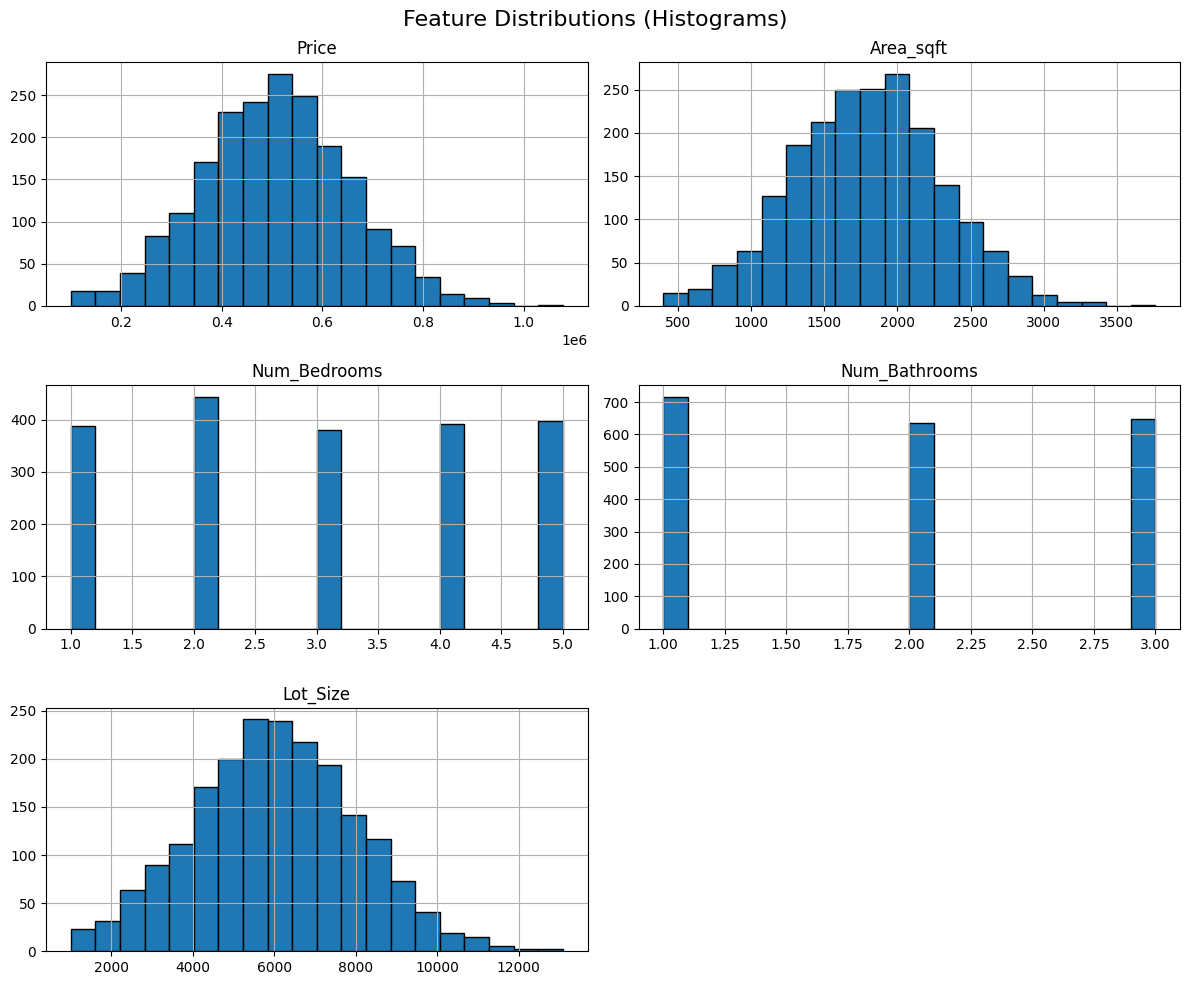

In [17]:
# histogram
import matplotlib.pyplot as plt

# Plot histograms for each feature
df[columns_to_normalize].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions (Histograms)', fontsize=16)
plt.tight_layout()
plt.show()

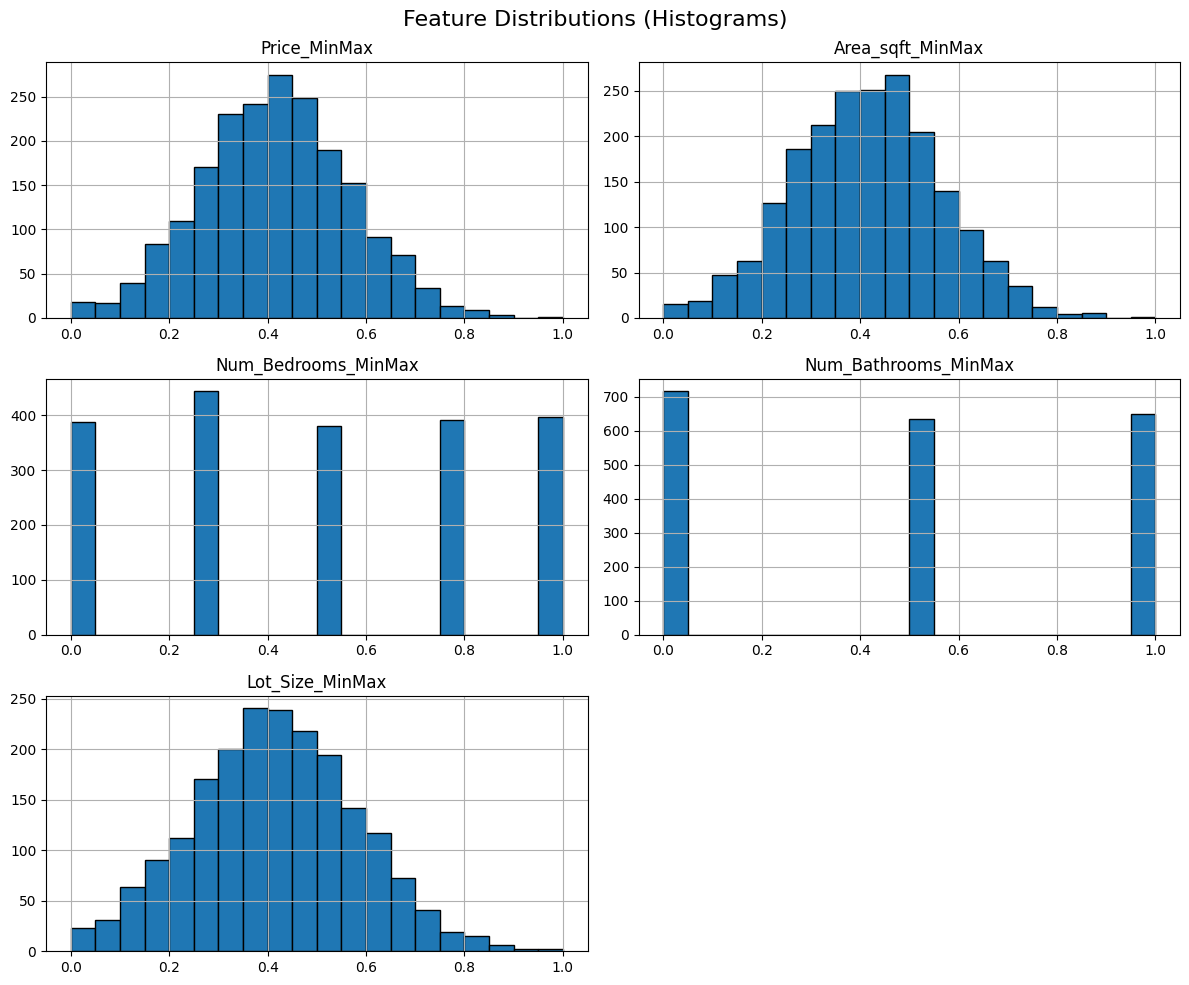

In [21]:
# histogram
import matplotlib.pyplot as plt

# Plot histograms for each feature
normalized_columns = ['Price_MinMax', 'Area_sqft_MinMax', 'Num_Bedrooms_MinMax', 'Num_Bathrooms_MinMax', 'Lot_Size_MinMax']
normalized_df[normalized_columns].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions (Histograms)', fontsize=16)
plt.tight_layout()
plt.show()

Talking Point 1

- In the EDA process, lot of data analysis was done which is good but the exploration part like checking for null values and duplicate values and also the statistical analysis was missing . Also reading the dataset could be done inside the class ( just a good practice)

- Reviewed by - Manu Mathew, Parth , Kumari Nikitha